In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [22]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [23]:
def setParameters(X, Y, hidden_size):
  np.random.seed(3)
  input_size = X.shape[0] # number of neurons in input layer
  output_size = Y.shape[0] # number of neurons in output layer.
  W1 = np.random.randn(hidden_size, input_size)*np.sqrt(2/input_size)
  b1 = np.zeros((hidden_size, 1))
  W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size)
  b2 = np.zeros((output_size, 1))
  return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}


In [24]:
# # Python implementation
# np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size)
# np.random.randn(output_size, hidden_size)*0.01

In [25]:
def forwardPropagation(X, params):
  Z1 = np.dot(params['W1'], X)+params['b1']
  A1 = np.tanh(Z1)
  Z2 = np.dot(params['W2'], A1)+params['b2']
  y = sigmoid(Z2)  
  return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

In [26]:
def cost(predict, actual):
  m = actual.shape[1]
  cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
  return np.squeeze(cost__)

In [27]:
def backPropagation(X, Y, params, cache):
  m = X.shape[1]
  dy = cache['y'] - Y
  dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
  db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
  dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
  dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
#   print('dW1:', dW1.shape)
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
  return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [28]:
# def updateParameters(gradients, params, learning_rate = 2.2):
#     W1 = params['W1'] - learning_rate * gradients['dW1']
#     b1 = params['b1'] - learning_rate * gradients['db1']
#     W2 = params['W2'] - learning_rate * gradients['dW2']
#     b2 = params['b2'] - learning_rate * gradients['db2']
#     return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

In [29]:
def updateParameters(gradients, params, learning_rate_wg, learning_rate_bias):
    W1 = params['W1'] - learning_rate_wg * gradients['dW1']
    b1 = params['b1'] - learning_rate_bias * gradients['db1']
    W2 = params['W2'] - learning_rate_wg * gradients['dW2']
    b2 = params['b2'] - learning_rate_bias  * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

In [30]:
# def fit(X, Y, learning_rate, hidden_size, number_of_iterations = 5000):
#   params = setParameters(X, Y, hidden_size)
#   cost_ = []
#   for j in range(number_of_iterations):
#     y, cache = forwardPropagation(X, params)
#     costit = cost(y, Y)
#     gradients = backPropagation(X, Y, params, cache)
#     params = updateParameters(gradients, params, learning_rate)
#     cost_.append(costit)
#   return params, cost_

In [31]:
def fit(X, Y, learning_rate_wg, learning_rate_bias, hidden_size, number_of_iterations = 5000):
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    for j in range(number_of_iterations):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate_wg, learning_rate_bias)
        cost_.append(costit)
    return params, cost_

In [32]:
# import sklearn.datasets
# X, Y = sklearn.datasets.make_moons(n_samples=500, noise=.2)
# X, Y = X.T, Y.reshape(1, Y.shape[0])


In [33]:
X=np.array([[0,0,1,1],[0,1,0,1]])
# x1 = x.copy()
# These are XOR outputs
Y=np.array([[0,1,1,0]])
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [34]:
# Random seed
np.random.seed(3)
# Input layer
input_size = X.shape[0] # number of neurons in input layer
# Output layer
output_size = Y.shape[0] # number of neurons in output layer.
# First hidden layer
hidden_size_1 = 2
W1 = np.random.randn(hidden_size_1, input_size)*np.sqrt(2/hidden_size_1)
b1 = np.zeros((hidden_size_1, 1))
z_x_0 = np.dot(W1,X) + b1
z_x_0

array([[ 0.        ,  0.43650985,  1.78862847,  2.22513832],
       [ 0.        , -1.8634927 ,  0.09649747, -1.76699524]])

In [35]:
# Size of input layer array
row_input,col_input = z_x_0.shape
z_x = z_x_0.copy()
for i in range(row_input):
    for j in range(col_input):
        if np.abs(z_x_0[i][j]) >= 0.5:
            z_x[i][j] = 1
        else:
            z_x[i][j] = 0
z_x

array([[0., 0., 1., 1.],
       [0., 1., 0., 1.]])

In [36]:
# Hidden Layers
hidden_size_2 = row_input * col_input
params, cost_ = fit(z_x, Y, 2.2, 1.2, hidden_size_2, 5000)


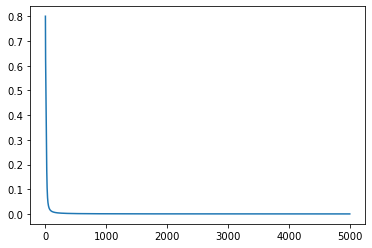

In [37]:
plt.plot(cost_)

In [38]:
def predict(params,input):    
#     print('pred2:',wg)
#     w1 = wg[0]
#     w2 = wg[1]
#     b1 = bias[0]
#     b2 = bias[1]
#     z1,a1,z2,a2 = forward_prop(w1,w2,b1,b2,test)
    y,cache = forwardPropagation(input, params)
#     diff_0 = np.sum(cache['A1'])
#     if diff_0 < 0.01:
#         diff = diff_0
#     else:
#         diff = y
#     z,a = forward_prop_3(wg,bias,input,hidden_layer)
#     z,a = (wg,bias,x,hidden_layer)
#     print('a:', a[1])
#     print('a_val:', np.squeeze(a[1]))
#     print('a_pred:',a[1])
#     a2 = np.squeeze(a2)
#     print('a_squeeze',a2)
#     if a2>=0.5:
#         print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
#     else:
#         print("For input", [i[0] for i in input], "output is 0")
#     return np.squeeze(np.mean(a[0]))
    return np.squeeze(y),cache

In [39]:
# test = np.array([[1,0],[1,0]])
# y,cache,diff = predict(params,test)
# print(y[0])
# # print(diff[0])
# test = np.array([[0,0],[0,0]])
# y,cache,diff = predict(params,test)
# print(y[0])
# # print(diff[0])
# test = np.array([[0,1],[1,0]])
# y,cache,diff = predict(params,test)
# print(y[0])
# # print(diff[0])
# test = np.array([[1,1],[1,1]])
# y,cache,diff = predict(params,test)
# print(y[0])
# # print(diff)

In [40]:
test = np.array([[1],[0]])
y,cache = predict(params,test)
print(y)
# print(diff[0])
test = np.array([[0],[0]])
y,cache = predict(params,test)
print(y)
# print(diff[0])
test = np.array([[0],[1]])
y,cache = predict(params,test)
print(y)
# print(diff[0])
test = np.array([[1],[1]])
y,cache = predict(params,test)
print(y)
# print(diff)

0.9998767892322709
2.7628457703954013e-05
0.999874859627669
0.00014951275060345756
